# CS171-EE142 - Fall 2022 - Homework 1

# Due: Thursday, October 13, 2022 @ 11:59pm

### Maximum points: 75 pts


## Submit your solution to Gradescope:
1. Submit a single PDF to **HW1**
2. Submit your jupyter notebook to **HW1-code**

**See the additional submission instructions at the end of this notebook**


## Enter your information below:

### Your Name (submitter): Alex
    
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>


## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


# Overview 
In this assignment you will explore some basic computations on data and build a nearest neighbor classifier.  

For this assignment we will use the functionality of Pandas (https://pandas.pydata.org/), Matplotlib (https://matplotlib.org/), and Numpy (http://www.numpy.org/). You may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

If you are asked to **implement** a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, please ask. 

Before you start, make sure you have installed all those packages in your local Jupyter instance

## Read *all* cells carefully and answer all parts (both text and missing code)

You will complete all the code marked `TODO` and answer descriptive/derivation questions 


In [ ]:
# Standard library imports.
import random as rand
from collections import Counter

# Related third party imports.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Local application/library specific imports.
# import here if you write .py script 

# Getting real data
In this assignment we are going to use the [penguins dataset](https://github.com/allisonhorst/palmerpenguins). 

[More info](https://twitter.com/allison_horst/status/1270046399418138625?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1270046399418138625%7Ctwgr%5E4eb4ba5263d32f342d1474db5259af92ae2c33d3%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.meganstodel.com%2Fposts%2Fno-to-iris%2F)

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/logo.png" height="200" />

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png" height="200" />

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" height="200" />

This dataset can also be easily imported from seaborn
https://github.com/mwaskom/seaborn-data

In [ ]:
data = sns.load_dataset("penguins") # load penguins dataset from seaborn
data = data.dropna() # drop samples with missing values (NaN) 
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


This data has 344 samples and we keep the 333 samples without missing values 

We will treat `'species'` as the label for each data sample and remaining 6 entries as the features `['island', 'bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex']`. 

The `'species'` label has three possible values `['Adelie', 'Chinstrap', 'Gentoo']`.

**Note** *that the arrangement of data samples is different from the notation we used in the class. In the class, data samples are given as column vectors. Here data samples are given as row vectors. `data` has 333 sample vectors, each of length 6 and stored as rows of `data`.*


In this homework, we will only focus on the 4 **numerical features**.
We can visualize pair-wise relations among 4 numerical features 
`['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']` in the data using scatterplot of all pairs of features and color the points by class label.

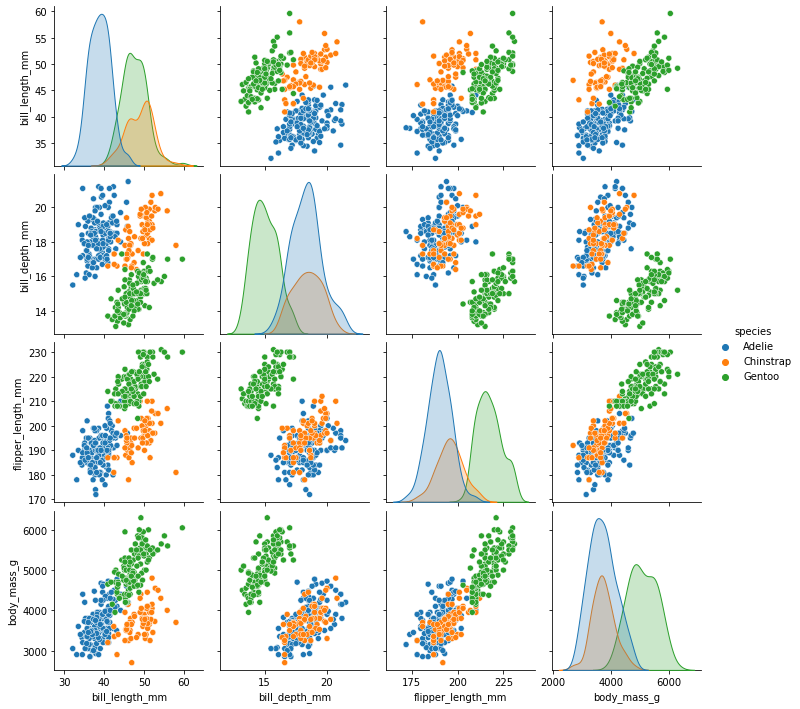

In [ ]:
fig = sns.pairplot(data, hue="species")

## Question 1: Basic data analysis [25 pts]

## Question 1a: Counting and simple statistics [5]

1. Calculate and print the min, max, and mean values of each of the four features in the entire dataset [1]

1. Count and print the number of samples that belong to each of the three categories [1] 

1. Calculate and print the mean of each feature for each label as a $3\times 4$ table [3]

*Note: For **mean** values, keep 1 digit after the decimal point when printing*

In [ ]:
# TODO: complete the code blocks below

print("\n1. print min, max, mean values of 4 features:\n")
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']

#Completed printing min max mean of features
for feature in features:
  penguinMean = 0
  penguinMin = data[feature][0]
  penguinMax = data[feature][0]
  numElements = 0

  for cell in data[feature] :
    
    if cell > penguinMax :
      penguinMax = cell

    if cell < penguinMin :
      penguinMin = cell
    
    penguinMean = penguinMean + cell
    numElements = numElements + 1
    

  penguinMean = penguinMean / numElements
  penguinMean = "{0:.1f}".format(penguinMean)
  print(f"(min, max, mean) of {feature}: ({penguinMin}, {penguinMax}, {penguinMean})")
  
  
  pass
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#PROBLEM 1a PART 2
print("\n2. print number of samples per category:\n")

categories = ['Adelie', 'Chinstrap', 'Gentoo']

numAdelie = 0
numChinstrap = 0
numGentoo = 0

for specie in data['species'] :
  
  if specie == 'Adelie' :
    numAdelie = numAdelie + 1

  elif specie == 'Chinstrap' :
    numChinstrap = numChinstrap + 1

  elif specie == 'Gentoo' :
    numGentoo = numGentoo + 1


print(f"number of samples in {'Adelie'}: {numAdelie}")
print(f"number of samples in {'Chinstrap'}: {numChinstrap}")
print(f"number of samples in {'Gentoo'}: {numGentoo}")

"""
for category in categories :
  



    # print(f"number of samples in {category}: {}")
  pass 
"""
print("\n3. print a 3x4 table of mean value of feature for each label:\n")
# TODO: create a table (as a list) with mean values

rows, cols = (4, 3)
answer_table = [[0 for i in range(cols)] for j in range(rows)]

adelieMean = 0
chinstrapMean = 0
gentooMean = 0
indexCnt = 0
sum = 0

size = 0
#billLength

for _, row in data.iterrows() :
  if row['species'] == 'Adelie' :
    answer_table[0][0] = answer_table[0][0] + row['bill_length_mm']
    answer_table[1][0] = answer_table[1][0] + row['bill_depth_mm']
    answer_table[2][0] = answer_table[2][0] + row['flipper_length_mm']
    answer_table[3][0] = answer_table[3][0] + row['body_mass_g']

  elif row['species'] == 'Chinstrap' :

    answer_table[0][1] = answer_table[0][1] + row['bill_length_mm']
    answer_table[1][1] = answer_table[1][1] + row['bill_depth_mm']
    answer_table[2][1] = answer_table[2][1] + row['flipper_length_mm']
    answer_table[3][1] = answer_table[3][1] + row['body_mass_g']

  elif row['species'] == 'Gentoo' :

    answer_table[0][2] = answer_table[0][2]+ row['bill_length_mm']
    answer_table[1][2] = answer_table[1][2] + row['bill_depth_mm']
    answer_table[2][2] = answer_table[2][2] + row['flipper_length_mm']
    answer_table[3][2] = answer_table[3][2] + row['body_mass_g']

#print("before data manipulation: ")
#print(answer_table)

for i in range(len(answer_table)) :

  for j in range(len(answer_table[i])) :

    if j is 0 :
      answer_table[i][j] = round(answer_table[i][j] / numAdelie, 1)
      

    elif j is 1 :
      answer_table[i][j] = round(answer_table[i][j] / numChinstrap, 1)

    elif j is 2 :
      answer_table[i][j] = round(answer_table[i][j] / numGentoo, 1)

print("Rows are bill length, bill depth, flipper length, and mass respectively")
print(answer_table)

print('\n')

pd.set_option("display.precision", 1)
panda_table = pd.DataFrame(answer_table, columns =['Adelie', 'Chinstrap', 'Gentoo'])
print(panda_table)


1. print min, max, mean values of 4 features:

(min, max, mean) of bill_length_mm: (32.1, 59.6, 44.0)
(min, max, mean) of bill_depth_mm: (13.1, 21.5, 17.2)
(min, max, mean) of flipper_length_mm: (172.0, 231.0, 201.0)
(min, max, mean) of body_mass_g: (2700.0, 6300.0, 4207.1)

2. print number of samples per category:

number of samples in Adelie: 146
number of samples in Chinstrap: 68
number of samples in Gentoo: 119

3. print a 3x4 table of mean value of feature for each label:

Rows are bill length, bill depth, flipper length, and mass respectively
[[38.8, 48.8, 47.6], [18.3, 18.4, 15.0], [190.1, 195.8, 217.2], [3706.2, 3733.1, 5092.4]]


   Adelie  Chinstrap  Gentoo
0    38.8       48.8    47.6
1    18.3       18.4    15.0
2   190.1      195.8   217.2
3  3706.2     3733.1  5092.4


### Question 1b: Implement the $\ell_p$ distance function [10]
1. Write code that implements the Lp distance function between two data points as we saw it in class [7] \\
$\ell_p$ distance between two vectors $\mathbf{x}_i, \mathbf{x}_j$ in $\mathbb{R}^d$ can be written as  
$$\|\mathbf{x}_i - \mathbf{x}_j\|_p = \left(\sum_{k=1}^d |\mathbf{x}_i(k) - \mathbf{x}_j(k)|^p\right)^{1/p}. $$
You should implement this function yourself. Do not use any built-in function to compute distance or norm. 

2. Verify that it is correct by comparing it for p=1 and p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [3]

In [ ]:
# TODO: complete the function below
def distance(x,y,p=2):
    """calculates Lp distance between point x and point y
    Args:
        x (np.ndarray): datapoint x
        y (np.ndarray): datapoint y
        p (int): order of Lp norm
    """
    xyDiffList = []
    processedDiffVal = 0
    xyDiffListSum = 0

   # print(x)
    for i in range(len(x)) :
      processedDiffVal = abs((x[i] - y[i]))**p
      xyDiffList.append(processedDiffVal)

    for element in xyDiffList :
      xyDiffListSum = xyDiffListSum + element

    xyDiffListSum = xyDiffListSum**(1/p)

    return xyDiffListSum
    



# TODO: pick 2 samples from the dataset (only keep the numerical features)
# calculate the distance and compare with numpy built-in function

#index 0 and index 338 p = 1

data_point1 = np.array([39.1, 18.7, 181.0, 3750.0])
data_point2 = np.array([47.2, 13.7, 214.0, 4925.0])
p = 1

print('Let p = 1')

dist = distance(data_point1, data_point2, p)
print(f"my distance: {dist}")

dist_np = np.linalg.norm(data_point1 - data_point2, p)
print(f"np distance: {dist_np}")

print('\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ p = 2

print('Let p = 2')

data_point1 = np.array([39.1, 18.7, 181.0, 3750.0])
data_point2 = np.array([47.2, 13.7, 214.0, 4925.0])
print(type(data_point1))
p = 2

dist = distance(data_point1, data_point2, p)
print(f"my distance: {dist}")

# verify using numpy built-in function
dist_np = np.linalg.norm(data_point1 - data_point2, p)
print(f"np distance: {dist_np}")

Let p = 1
my distance: 1221.1
np distance: 1221.1


Let p = 2
<class 'numpy.ndarray'>
my distance: 1175.5018545285243
np distance: 1175.5018545285243


### Question 1c: Compute the distance matrix between all data points [10]
1. Compute an $N\times N$ distance matrix between all data points (where $N=333$ is the number of data points) [3]
2. Plot the above matrix and include a colorbar. Add title and x/y labels to the plot.[3]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [2]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [2]

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
3              36.7           19.3              193.0       3450.0
4              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
328            47.2           13.7              214.0       4925.0
329            46.8           14.3              215.0       4850.0
330            50.4           15.7              222.0       5750.0
331            45.2           14.8              212.0       5200.0
332            49.9           16.1              213.0       5400.0

[333 rows x 4 columns]

1. Compute distance matrix

[[   0.           50.26778292  500.19789084 ... 2000.45437089
  1450.34941307 1650.34766034]
 [  50.26778292    0.          550.0745404  ... 19

[Text(83.40000000000006, 0.5, 'Y-Axis'), Text(0.5, 15.0, 'X-Axis')]

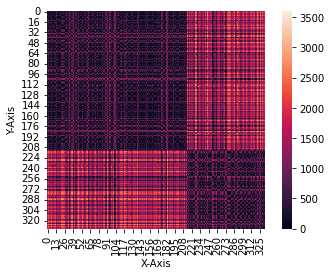

In [ ]:
# TODO: complete the function below

billLengthArr = np.array(data['bill_length_mm'])
billDepthArr = np.array(data['bill_depth_mm'])
flipperLengthArr = np.array(data['flipper_length_mm'])
massArr = np.array(data['body_mass_g'])

#rows, cols = (333, 4)
#feature_rows_table = [[0 for i in range(cols)] for j in range(rows)]

featureArray = []
"""
for i in range(len(billLengthArr)) :
  featureArray.append(billLengthArr[i])
  featureArray.append(billDepthArr[i])
  featureArray.append(flipperLengthArr[i])
  featureArray.append(massArr[i])

featureArray = np.array(featureArray)
featureArray = featureArray.reshape(333,4)
"""
#panda_table = pd.DataFrame(answer_table, columns =['Adelie', 'Chinstrap', 'Gentoo'])

X = data[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']].values

panda_features_table = pd.DataFrame(X,columns = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g'] )
print(panda_features_table)

distanceMatrix = []
data_point_x  = []
data_point_y = []
cnt = 0

for _, slowRow in panda_features_table.iterrows() :
  
  data_point_x = np.array(slowRow)
 
  for _, fastRow in panda_features_table.iterrows() :
    data_point_y = np.array(fastRow)
    cnt = cnt + 1

    #print("CNT: ", cnt, )

    #print (distance(data_point_x, data_point_y, 2 ))
    distanceMatrix.append(distance(data_point_x, data_point_y, 2 ))

distanceMatrix = np.array(distanceMatrix)
reshapedDistanceMatrix = distanceMatrix.reshape(333,333)


#throw it all into one list all 333x333 items then reshape into a numpy 333x333 numpy array

print("\n1. Compute distance matrix\n")
print (reshapedDistanceMatrix)

print("\n2. Plot matrix with a colorbar.\n")
heatMap = sns.heatmap(reshapedDistanceMatrix,cbar = True, square = True)
heatMap.set(xlabel='X-Axis', ylabel='Y-Axis')


**Write your answer here**:

3. The minimum number of distance calculations that really needs to be done is 55,112 instead of the 110889. First off, this is because we have 333 values that just subtract from themselves in the distance calculation. For example let x1 be a data point. We do x1 - x1 which is redundant. Because there are 333 datapoints, the self subtraction happens 333 times. Second, half of the values are duplicates. Because we take an absolute value during the distance calculations this means that x1 - x2 is exactly equal to x2 - x1. This occurs for all data points so we can subtract 55,444 calculations.


4. The heat map almost looks organized or reflected geometrically probably due to the fact that half of the values are duplicate values 

## Question 2: K-Nearest Neighbors Classifier [50 pts]
The K-Nearest Neighbors Classifier is one of the most popular instance-based (and in general) classification models. In this question, we will implement our own version and test in different scenarios.

### Question 2a: Implement the K-NN Classifier [20]
For the implementation, your function should have the format:
```python
def knnclassify(test_data,training_data, training_labels, K=1):
```
where `test_data` contains test data points, `training_data` contains training data points, `training_labels` holds the training labels, and `K` is the number of neighbors. 

The output of this function should be `pred_labels` which contains the predicted label for each test data point (it should, therefore, have the same number of rows as `test_data`).


In [ ]:
# prepare datasets, convert to numpy array, X - data values, Y - labels
X = data[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']].values
all_labels = data['species'].values
unique_labels = np.unique(all_labels)
new_labels = np.zeros(len(all_labels))
for i in range(0,len(unique_labels)):
  new_labels[all_labels == unique_labels[i]] = i
Y = new_labels

In [ ]:
# TODO: complete the function below

def knnclassify(test_data, training_data, training_labels, K):
  """KNN classifier
    Args:
      test_data (numpy.ndarray): Test data points.
      training_data (numpy.ndarray): Training data points.
      training_labels (numpy.ndarray): Training labels.
      K (int): The number of neighbors.
    
    Returns:
      pred_labels: contains the predicted label for each test data point, have the same number of rows as 'test_data'
  """

  euclid_Distance_Trup_List = []
  first_k_idx_list = []
  euclidDistance = 0
  adelieCnt = 0
  chinstrapCnt = 0
  gentooCnt = 0
  predictionsList = []

  #making a pair out of training data and training labels
  #truple (euclidian distance, test data point,  and the training label)
  #can sort the list of truples by euclidian distnace and the top k we can poll
  #the training labels and to see which species to assign

  #new_list.sort(key=lambda y: y[1])
 # print("TestData: ")
 # print(test_data)
  for i in range(len(test_data)) :

    for j in range(len(training_data)) :
      # print("Test Data[i]: ")
      # print(test_data[i])
      euclidianDistance = distance(test_data[i], training_data[j], 2)
      tempTruple = (euclidianDistance, test_data[i], training_labels[j])
      euclid_Distance_Trup_List.append(tempTruple)
    
    euclid_Distance_Trup_List.sort(key=lambda tupDex: tupDex[0])
    first_k_idx_list = euclid_Distance_Trup_List[:K]
    
    for val in first_k_idx_list :
      if val[2] == 'Adelie' :
        adelieCnt = adelieCnt + 1
      
      elif val[2] == 'Chinstrap' :
        chinstrapCnt = chinstrapCnt + 1

      elif val[2] == 'Gentoo' :
        gentooCnt = gentooCnt + 1

    if adelieCnt > chinstrapCnt and adelieCnt > gentooCnt :
      tempTuple = (test_data[i], 'Adelie')
      predictionsList.append(tempTuple)

    elif chinstrapCnt > adelieCnt and chinstrapCnt > gentooCnt :
      tempTuple = (test_data[i], 'Chinstrap')
      predictionsList.append(tempTuple)

    elif gentooCnt > adelieCnt and gentooCnt > chinstrapCnt :
      tempTuple = (test_data[i], 'Gentoo')
      predictionsList.append(tempTuple)

    #reset values
    euclid_Distance_Trup_List.clear()
    adelieCnt = 0
    chinstrapCnt = 0
    gentooCnt = 0

  predictionsArray = np.array(predictionsList)
  return predictionsArray

featureValues = data[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']].values

testVals = np.array(featureValues[330:333])


#print(testVals)
#print(type(testVals))

trainingParameters = featureValues[2:330]
trainLabels = all_labels[2:330]
answer = knnclassify(testVals, trainingParameters, trainLabels, 10)
print(type(answer))
print (answer)







<class 'numpy.ndarray'>
[[array([  50.4,   15.7,  222. , 5750. ]) 'Gentoo']
 [array([  45.2,   14.8,  212. , 5200. ]) 'Gentoo']
 [array([  49.9,   16.1,  213. , 5400. ]) 'Gentoo']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


### Question 2b: Measuring performance [20]

In this question you will have to evaluate the average performance of your classifier for different values of $K$. In particular, $K$ will range in $\{1,\cdots,10\}$. We are going to measure the performance using classification accuracy. For computing the accuracy, you may use
```python
accuracy = sum(test_labels == pred_labels)/len(test_labels)
```
where `test_labels` are the actual class labels and `pred_labels` are the predicted labels


In order to get a proper estimate for the accuracy for every K, we need to run multiple iterations where for each iteration we get a different randomized split of our data into train and test. In this question, we are going to run 100 iterations for every K, and for every random splitting, you may use:

```python
(training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.3)
```
where the train/test ratio is 70/30. 

After computing the accuracy for every $K$ for every iteration, you will have 100 accuracies per $K$. The best way to store those accuracies is in a matrix that has as many rows as values for $K$ and 100 columns, each one for each iteration.

Compute average accuracy as a function of $K$. Because we have a randomized process, we also need to compute how certain/uncertain our estimation for the accuracy per $K$ is. For that reason, we also need to compute the standard deviation of the accuracy for every $K$. Having computed both average accuracy and standard deviation, make a figure that shows the average accuracy as a function of $K$ with each point of the figure being surrounded by an error-bar encoding the standard deviation. You may find 
```python
plt.errorbar()
```
useful for this plot.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[0.86 0.86 0.83 0.89 0.85 0.75 0.78 0.79 0.81 0.79 0.85 0.82 0.88 0.8
  0.77 0.8  0.85 0.88 0.83 0.83 0.86 0.84 0.84 0.89 0.84 0.9  0.78 0.82
  0.82 0.82 0.87 0.8  0.81 0.74 0.93 0.79 0.86 0.84 0.83 0.87 0.82 0.76
  0.85 0.83 0.82 0.89 0.81 0.74 0.78 0.83 0.76 0.84 0.86 0.82 0.85 0.85
  0.83 0.81 0.83 0.82 0.76 0.81 0.86 0.88 0.79 0.78 0.8  0.89 0.82 0.83
  0.88 0.87 0.87 0.84 0.8  0.91 0.83 0.82 0.85 0.9  0.82 0.84 0.85 0.83
  0.83 0.79 0.77 0.81 0.79 0.84 0.85 0.83 0.82 0.87 0.88 0.82 0.8  0.85
  0.91 0.86]
 [0.18 0.29 0.34 0.22 0.31 0.37 0.26 0.42 0.24 0.28 0.31 0.32 0.31 0.32
  0.25 0.34 0.2  0.29 0.24 0.32 0.4  0.24 0.37 0.34 0.33 0.29 0.25 0.33
  0.31 0.33 0.32 0.25 0.26 0.22 0.26 0.33 0.35 0.26 0.27 0.3  0.29 0.25
  0.21 0.3  0.3  0.32 0.28 0.22 0.3  0.22 0.42 0.32 0.3  0.33 0.33 0.29
  0.28 0.35 0.3  0.35 0.26 0.26 0.37 0.33 0.34 0.37 0.3  0.3  0.26 0.33
  0.22 0.31 0.29 0.35 0.21 0.26 0.33 0.33 0.29 0.24 0.33 0.31 0.37 0.24
  0.38 0.34 0.25 0.25 0.33 0.32 0.3  0.25 0.28 0.29 

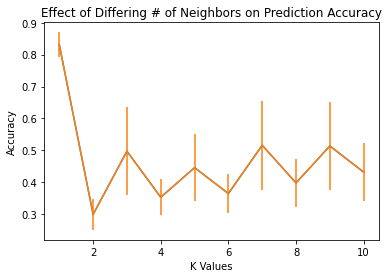

In [ ]:
# TODO: write your code here
# You should be able to get above 80% accuracies

#for every k we are doing 100 testsi think
#throw the entire results into an single list then convert it to a numpy array 
#then reshape that array into a 10x100 column 2darray


all_vals = data[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']].values
out_training_data = None
out_training_labels = None
out_test_data = None
out_test_labels = None
isCorrectCnt = 0
enterCnt = 0

accuracy_matrix = []
test_result_predictions = []

# print (out_training_data)
#print(all_labels)
#print(all_vals)

# (out_training_data,out_test_data, out_training_labels, out_test_labels) = train_test_split(all_vals, all_labels, test_size = 0.3)
# print(out_test_labels)
# print(out_training_labels)
#def knnclassify(test_data, training_data, training_labels, K):
#returns an entire predictions array
#accuracy = sum(test_labels == pred_labels)/len(test_labels)


for k in range(1,11) :

  for counter in range(100) :
    (out_training_data, out_test_data, out_training_labels,  out_test_labels) = train_test_split(all_vals, all_labels, test_size = 0.3)
    temp_test_result = knnclassify(out_test_data, out_training_data, out_training_labels, k)
    
    for i in range(len(temp_test_result)) :

      #print("testResult[i]: ", temp_test_result[i][1])
      #print("out_test_labels[i]: ", out_test_labels[i])

      if temp_test_result[i][1] == out_test_labels[i] :
        isCorrectCnt = isCorrectCnt + 1

    accuracy =  isCorrectCnt / len(out_test_labels)
    accuracy_matrix.append(accuracy)
    isCorrectCnt = 0
    enterCnt = enterCnt + 1
    #print("enter Cnt:", enterCnt)

#featureArray = featureArray.reshape(333,4)
accuracy_matrix = np.array(accuracy_matrix)
accuracy_matrix = accuracy_matrix.reshape(10, 100)
print(accuracy_matrix)

KMeans = accuracy_matrix.mean(axis=1) 
totalMean = KMeans.mean()
standardDeviationsForKs = np.std(accuracy_matrix,axis=1)
print("Standard Deviations for each K in order of ascending K: ")
print(standardDeviationsForKs)
print("Average Accuracies for each K in order of ascending K values: ")
print(KMeans)

xPlot = [1,2,3,4,5,6,7,8,9,10]
plt.plot(xPlot, KMeans)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Effect of Differing # of Neighbors on Prediction Accuracy')
plt.errorbar(xPlot, KMeans, yerr = standardDeviationsForKs)

plt.show()




  




### Question 2c: Feature Selection [10]

For the following questions, you should perform KNN classification using only 2 features from `['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']` per sample. 

*You may want to refer to pairplot above to decide which features are best*

**Answer the following questions** 

1. Which two features did you choose to get the **best** performance for KNN algorithm? 
1. Which two features did you choose to get the **worst** performance for KNN algorithm? 
2. Why? (Justify your answer) 


**Write your answer here:**

1. Flipper length and bill length

2. Mass and Bill depth

3. The two features I chose to get the best performance for the KNN algorithm were flipper length and bill length. I choose these two because although flipper length shows little variation in values between adelie and chinstrap, flipper length shows a lot of variation between flipper length for Gentoo and the other two species. The Bill Length is the 2nd feature I'm choosing because it differentiates well the Adelie and Chinstrap. Together these two features can sort out whether or not a mystery penguin is Gentoo, Adelie, or Chinstrap

For the worst features, I choose mass and bill depth.  Although mass is actually a decent classifying feature for Gentoo, there is little variation in mass between Adelie and Chinstrap. Bill depth was chosen as the other worst feature because the bill depth across all birds had very little variation. 

---
## Submission instructions
1. Download this Colab to ipynb, and convert it to PDF. Follow similar steps as [here](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab) but convert to PDF.
 - Download your .ipynb file. You can do it using only Google Colab. `File` -> `Download` -> `Download .ipynb`
 - Reupload it so Colab can see it. Click on the `Files` icon on the far left to expand the side bar. You can directly drag the downloaded .ipynb file to the area. Or click `Upload to session storage` icon and then select & upload your .ipynb file.
 - Conversion using %%shell. 
 ```
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!jupyter nbconvert --log-level CRITICAL --to pdf name_of_hw.ipynb
  ```
 - Your PDF file is ready. Click 3 dots and `Download`.


  

2. Upload the PDF to Gradescope, select the correct pdf pages for each question. **Important!**

3. Upload the ipynb file to Gradescope

In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!jupyter nbconvert --log-level CRITICAL --to pdf fall2022_hw1.ipynb # make sure the ipynb name is correct

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done
Reading package lists... Done
Building dependency t